# **Identifying Key Entities in Recipe Data**


**Business Objective**:
The goal of this assignment is to train a Named Entity Recognition (NER) model using Conditional Random Fields (CRF) to extract key entities from recipe data. The model will classify words into predefined categories such as ingredients, quantities and units, enabling the creation of a structured database of recipes and ingredients that can be used to power advanced features in recipe management systems, dietary tracking apps, or e-commerce platforms.

### **Data Description**
The given data is in JSON format, representing a **structured recipe ingredient list** with **Named Entity Recognition (NER) labels**. Below is a breakdown of the data fields:

```json
[
    {
        "input": "6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil",
        "pos": "quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient"
    },
    {
      "input": "2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida",
      "pos": "quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient"
    }
]


| **Key**  | **Description**  |
|----------|-----------------|
| `input`  | Contains a raw ingredient list from a recipe. |
| `pos`    | Represents the corresponding part-of-speech (POS) tags or NER labels, identifying quantities, ingredients, and units. |


## **1** Import libraries

#### **1.1** Installation of sklearn-crfsuite

sklearn-crfsuite is a Python wrapper for CRFsuite, a fast and efficient implementation of Conditional Random Fields (CRFs). It is designed to integrate seamlessly with scikit-learn for structured prediction tasks such as Named Entity Recognition (NER), Part-of-Speech (POS) tagging, and chunking.

In [117]:
# installation of sklearn_crfsuite
!pip install sklearn_crfsuite==0.5.0

#### **1.2** Import necessary libraries

In [118]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [119]:
# Import necessary libraries
import json  # For handling JSON data
import pandas as pd  # For data manipulation and analysis
import re  # For regular expressions (useful for text preprocessing)
import matplotlib.pyplot as plt  # For visualisation
import seaborn as sns  # For advanced data visualisation
import sklearn_crfsuite  # CRF (Conditional Random Fields) implementation for sequence modeling
import numpy as np  # For numerical computations
# Saving and loading machine learning models
import joblib
import random
import spacy
from IPython.display import display, Markdown # For displaying well-formatted output

from fractions import Fraction  # For handling fractional values in numerical data
# Importing tools for feature engineering and model training
from collections import Counter  # For counting occurrences of elements in a list
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets
from sklearn_crfsuite import metrics  # For evaluating CRF models
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
from sklearn.metrics import confusion_matrix


In [120]:
# Ensure pandas displays full content
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

## **2** Data Ingestion and Preparation <font color = red>[25 marks]</font> <br>

In [121]:


# Import pandas
import pandas as pd
import os, json


In [122]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Define the file path
file_path = '/content/drive/My Drive/NLP/ingredient_and_quantity.json'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **2.1** *Read Recipe Data from Dataframe and prepare the data for analysis* <font color = red>[12 marks]</font> <br>
Read the data from JSON file, print first five rows and describe the dataframe

##### **2.1.1** **Define a *load_json_dataframe* function** <font color = red>[7 marks]</font> <br>

Define a function that takes path of the ingredient_and_quantity.json file and reads it, convert it into dataframe - df and return it.

In [123]:
# define a function to load json file to a dataframe
import pandas as pd
file_path = '/content/drive/My Drive/NLP/ingredient_and_quantity.json'
def load_json_dataframe(file_path):
 df = pd.read_json(file_path)
 return df


##### **2.1.2** **Execute the *load_json_dataframe* function** <font color = red>[2 marks]</font> <br>

In [124]:
# read the json file by giving the file path and create a dataframe
df = pd.read_json(file_path)
df = load_json_dataframe(file_path)


##### **2.1.3** **Describe the dataframe** <font color = red>[3 marks]</font> <br>

Print first five rows of dataframe along with dimensions. Display the information of dataframe

In [125]:
# display first five rows of the dataframe - df
print(df.head())


                                                                                                                                                                                                                                                                                            input                                                                                                                                                                                                                                                                                                                                                                                                                                                                      pos
0                                                                                                 6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder D

In [126]:
# print the dimensions of dataframe - df

print(df.shape)


(285, 2)


In [127]:
# print the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   285 non-null    object
 1   pos     285 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


#### **2.2** *Recipe Data Manipulation* <font color = red>[13 marks]</font> <br>
Create derived metrics in dataframe and provide insights of the dataframe

##### **2.2.1** **Create input_tokens and pos_tokens columns by splitting the input and pos from the dataframe** <font color = red>[3 marks]</font> <br>
Split the input and pos into input_tokens and pos_tokens in the dataframe and display it in the dataframe

In [128]:
# split the input and pos into input_tokens and pos_tokens in the dataframe

# Tokenize input
# Tokenize POS

df['input_tokens'] = df['input'].apply(lambda x: x.split())
df['pos_tokens'] = df['pos'].apply(lambda x: x.split())


In [129]:
# display first five rows of the dataframe - df
print(df.head())
df.head()

                                                                                                                                                                                                                                                                                            input                                                                                                                                                                                                                                                                                                                                                                                                                                                                      pos                                                                                                                                                                                                                                                              

,input,pos,input_tokens,pos_tokens
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[6, Karela, Bitter, Gourd, Pavakkai, Salt, 1, Onion, 3, tablespoon, Gram, flour, besan, 2, teaspoons, Turmeric, powder, Haldi, Red, Chilli, Cumin, seeds, Jeera, Coriander, Powder, Dhania, Amchur, Dry, Mango, Sunflower, Oil]","[quantity, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]"
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient,"[2-1/2, cups, rice, cooked, 3, tomatoes, teaspoons, BC, Belle, Bhat, powder, 1, teaspoon, chickpea, lentils, 1/2, cumin, seeds, white, urad, dal, mustard, green, chilli, dry, red, 2, cashew, or, peanuts, 1-1/2, tablespoon, oil, asafoetida]","[quantity, unit, ingredient, ingredient, quantity, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient]"
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient,"[1-1/2, cups, Rice, Vermicelli, Noodles, Thin, 1, Onion, sliced, 1/2, cup, Carrots, Gajjar, chopped, 1/3, Green, peas, Matar, 2, Chillies, 1/4, teaspoon, Asafoetida, hing, Mustard, seeds, White, Urad, Dal, Split, Ghee, sprig, Curry, leaves, Salt, Lemon, juice]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient]"
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient ingredient unit ingredient ingredient qua

##### **2.2.2** **Provide the length for input_tokens and pos_tokens and validate their length** <font color = red>[2 marks]</font> <br>

Create input_length and pos_length columns in the dataframe and validate both the lengths. Check for the rows that are unequal in input and pos length


In [130]:
# create input_length and pos_length columns for the input_tokens and pos-tokens
df['input_length'] = df['input_tokens'].apply(len)
df['pos_length'] = df['pos_tokens'].apply(len)

In [131]:
# check for the equality of input_length and pos_length in the dataframe
unequal_length_rows = df[df['input_length'] != df['pos_length']]
unequal_length_rows[['input', 'pos', 'input_length', 'pos_length']]


,input,pos,input_length,pos_length
17,2 cups curd 1 cup gourd cucumber green cor coriander 1/2 teaspoon cumin powder salt,quantity unit ingredient quantity unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient,15,14
27,1 Baguette sliced 1 1/2 tablespoon Butter 1/2 Garlic minced cup Spinach Leaves Palak Red Bell pepper Capsicum Tomato finely chopped Onion Black powder Italian seasoning teaspoon Fresh cream Cheddar cheese grated Salt Roasted tomato pasta sauce,quantity ingredient ingredient quantity unit ingredient quantity ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,37,36
79,1/2 cup Poha Flattened rice 2 tablespoons Rice flour 2 1/2 liter Milk 1 Nolen Gur or brown sugar Cardamom Elaichi Pods/Seeds 8-10 Mixed nuts almonds/cashews tablespoon Raisins pinch Saffron strands and a little more for garnish Salt,quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient quantity unit ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient unit ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,38,37
164,1/2 cup All Purpose Flour Maida Whole Wheat 1/4 Hung Curd Greek Yogurt 250 grams Chicken minced 1 Spinach Leaves Palak finely chopped Onion 4 cloves Garlic Tomatoes tablespoon Cumin powder Jeera Coriander Powder Dhania 1 1/2 teaspoon Paprika Black pepper 3 sprig Mint Pudina 10 Spring Bulb & Greens 100 Feta Cheese crumbled,quantity unit ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient,54,53
207,1 cup Cashew nuts Badam Almond 1 1/4 cups Sugar 1/2 Water teaspoon Cardamom Powder Ghee for greasing,quantity unit ingredient ingredient ingredient ingredient quantity unit ingredient quantity ingredient unit ingredient ingredient ingredient unit ingredient,18,17


##### **2.2.3** **Define a unique_labels function and validate the labels in pos_tokens** <font color = red>[2 marks]</font> <br>

Define a unique_labels function which checks for all the unique pos labels in the recipe & execute it.


In [132]:
# Define a unique_labels function to checks for all the unique pos labels in the recipe & print it
def unique_labels(df):
   # Flatten the list of POS tokens and get unique labels
    all_pos_labels = [label for sublist in df['pos_tokens'] for label in sublist]
    unique_pos_labels = set(all_pos_labels)

    unique_labels(df)

    # Print the unique POS labels
    print("Unique POS Labels:", unique_pos_labels)


##### **2.2.3** **Provide the insights seen in the recipe data after validation** <font color = red>[1 marks]</font> <br>

Provide the indexes that requires cleaning and formatting in the dataframe

<font color = red>[write your answer]</font> <br>


The indexes that require cleaning and formatting due to mismatched lengths between input_length and pos_length or because of empty/null values are:

Indexes: 17, 27, 79, 164, 207
These rows should be reviewed and corrected. The issue could be related to:

A mismatch between the number of words and the number of POS tags.

Missing or empty values in either the input or pos columns.

Here are the problematic rows that require cleaning and formatting due to mismatched input_length and pos_length or because of empty/null values:

Index	Input	POS	Input Length	POS Length
17	2 cups curd 1 cup gourd cucumber green cor cor...	quantity unit ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient	15	14
27	1 Baguette sliced 1 1/2 tablespoon Butter 1/2...	quantity ingredient ingredient quantity unit ingredient unit ingredient ingredient quantity unit ingredient	37	36
79	1/2 cup Poha Flattened rice 2 tablespoons Rice...	quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient unit ingredient ingredient	38	37
164	1/2 cup All Purpose Flour Maida Whole Wheat 1/...	quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient unit ingredient	54	53
207	1 cup Cashew nuts Badam Almond 1 1/4 cups Suga...	quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient	18	17


##### **2.2.4** **Drop the rows that have invalid data provided in previous cell** <font color = red> [2 marks]</font> <br>

In [133]:
# drop the irrelevant recipe data
# Drop rows where the 'input' or 'pos' columns are empty or null
df_cleaned = df.dropna(subset=['input', 'pos'])

# Drop rows where 'input' or 'pos' columns are empty strings
df_cleaned = df_cleaned[(df_cleaned['input'] != '') & (df_cleaned['pos'] != '')]

# Optional: Drop rows with irrelevant text or placeholders (if any such values are identified)
# For example, if the input contains values like "N/A" or "Not Available", we can drop those rows
df_cleaned = df_cleaned[~df_cleaned['input'].str.contains('N/A|Not Available', case=False, na=False)]

# Display the cleaned dataframe
df_cleaned.head()

,input,pos,input_tokens,pos_tokens,input_length,pos_length
0,6 Karela Bitter Gourd Pavakkai Salt 1 Onion 3 tablespoon Gram flour besan 2 teaspoons Turmeric powder Haldi Red Chilli Cumin seeds Jeera Coriander Powder Dhania Amchur Dry Mango Sunflower Oil,quantity ingredient ingredient ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient,"[6, Karela, Bitter, Gourd, Pavakkai, Salt, 1, Onion, 3, tablespoon, Gram, flour, besan, 2, teaspoons, Turmeric, powder, Haldi, Red, Chilli, Cumin, seeds, Jeera, Coriander, Powder, Dhania, Amchur, Dry, Mango, Sunflower, Oil]","[quantity, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient]",31,31
1,2-1/2 cups rice cooked 3 tomatoes teaspoons BC Belle Bhat powder 1 teaspoon chickpea lentils 1/2 cumin seeds white urad dal mustard green chilli dry red 2 cashew or peanuts 1-1/2 tablespoon oil asafoetida,quantity unit ingredient ingredient quantity ingredient unit ingredient ingredient ingredient ingredient quantity unit ingredient ingredient quantity ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity unit ingredient ingredient,"[2-1/2, cups, rice, cooked, 3, tomatoes, teaspoons, BC, Belle, Bhat, powder, 1, teaspoon, chickpea, lentils, 1/2, cumin, seeds, white, urad, dal, mustard, green, chilli, dry, red, 2, cashew, or, peanuts, 1-1/2, tablespoon, oil, asafoetida]","[quantity, unit, ingredient, ingredient, quantity, ingredient, unit, ingredient, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, unit, ingredient, ingredient]",34,34
2,1-1/2 cups Rice Vermicelli Noodles Thin 1 Onion sliced 1/2 cup Carrots Gajjar chopped 1/3 Green peas Matar 2 Chillies 1/4 teaspoon Asafoetida hing Mustard seeds White Urad Dal Split Ghee sprig Curry leaves Salt Lemon juice,quantity unit ingredient ingredient ingredient ingredient quantity ingredient ingredient quantity unit ingredient ingredient ingredient quantity ingredient ingredient ingredient quantity ingredient quantity unit ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient ingredient unit ingredient ingredient ingredient ingredient ingredient,"[1-1/2, cups, Rice, Vermicelli, Noodles, Thin, 1, Onion, sliced, 1/2, cup, Carrots, Gajjar, chopped, 1/3, Green, peas, Matar, 2, Chillies, 1/4, teaspoon, Asafoetida, hing, Mustard, seeds, White, Urad, Dal, Split, Ghee, sprig, Curry, leaves, Salt, Lemon, juice]","[quantity, unit, ingredient, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, quantity, unit, ingredient, ingredient, ingredient, quantity, ingredient, ingredient, ingredient, quantity, ingredient, quantity, unit, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, ingredient, unit, ingredient, ingredient, ingredient, ingredient, ingredient]",37,37
3,500 grams Chicken 2 Onion chopped 1 Tomato 4 Green Chillies slit inch Ginger finely 6 cloves Garlic 1/2 teaspoon Turmeric powder Haldi Garam masala tablespoon Sesame Gingelly Oil 1/4 Methi Seeds Fenugreek Coriander Dhania Dry Red Fennel seeds Saunf cups Sorrel Leaves Gongura picked and,quantity unit ingredient quantity ingredient ingredient quantity ingredient quantity ingredient ingredient

##### **2.2.5** **Update the input_length & pos_length in dataframe**<font color = red> [2 marks]</font> <br>

In [134]:
# update the input and pos length in input_length and pos_length
# Update 'input_length' and 'pos_length' based on the length of 'input_tokens' and 'pos_tokens'
df['input_length'] = df['input_tokens'].apply(len)
df['pos_length'] = df['pos_tokens'].apply(len)

# Display the updated DataFrame
print(df.head())

                                                                                                                                                                                                                                                                                            input                                                                                                                                                                                                                                                                                                                                                                                                                                                                      pos                                                                                                                                                                                                                                                              

##### **2.2.6** **Validate the input_length and pos_length by checking unequal rows** <font color = red> [1 marks]</font> <br>

In [135]:
# validate the input length and pos length as input_length and pos_length
# Check for rows where 'input_length' and 'pos_length' are not equal
unequal_length_rows = df[df['input_length'] != df['pos_length']]
# Display the rows with unequal 'input_length' and 'pos_length'
print(unequal_length_rows[['input', 'pos', 'input_length', 'pos_length']])

                                                                                                                                                                                                                                                                                                                                   input                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               pos  input_length  pos_length
17                                                                                                                 

## **3** Train Validation Split (70 train - 30 val) <font color = red>[6 marks]</font> <br>

#### **3.1** *Perform train and validation split ratio* <font color = red>[6 marks]</font> <br>
Split the dataset with the help of input_tokens and pos_tokens and make a ratio of 70:30 split for training and validation datasets.

###### **3.1.1** **Split the dataset into train_df and val_df into 70:30 ratio** <font color = red> [1 marks]</font> <br>

In [136]:
# split the dataset into training and validation sets

from sklearn.model_selection import train_test_split

# Split the dataset based on 'input_tokens' and 'pos_tokens' with a 70:30 ratio
X = df['input_tokens']  # Features (input tokens)
y = df['pos_tokens']    # Labels (POS tokens)

# Perform a 70:30 split for training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and validation datasets
print("Training dataset size (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation dataset size (X_val, y_val):", X_val.shape, y_val.shape)


Training dataset size (X_train, y_train): (199,) (199,)
Validation dataset size (X_val, y_val): (86,) (86,)


###### **3.1.2** **Print the first five rows of train_df and val_df** <font color = red> [1 marks]</font> <br>

In [137]:
# print the first five rows of train_df
# Create a DataFrame for training data using the split input_tokens and pos_tokens
train_df = pd.DataFrame({
    'input_tokens': X_train,
    'pos_tokens': y_train
})


In [138]:
# print the first five rows of the train_df
print(train_df.head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   input_tokens                                                                                                                                                                                                                                                                                                                                                         

In [139]:
# Create a DataFrame for val data using the split input_tokens and pos_tokens
val_df = pd.DataFrame ({
    'input_tokens': X_val,
    'pos_tokens': y_val
})

In [140]:
# print the first five rows of the val_df
print(val_df.head())

                                                                                                                                                                                                                                                                                                                                                                                        input_tokens                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        pos_tokens
9                                

###### **3.1.3** **Extract the dataset into train_df and val_df into X_train, X_val, y_train and y_val and display their length** <font color = red> [2 marks]</font> <br>

Extract X_train, X_val, y_train and y_val by extracting the list of input_tokens and pos_tokens from train_df and val_df and also display their length

In [141]:
# extract the training and validation sets by taking input_tokens and pos_tokens
X_train = train_df['input_tokens'].tolist()
y_train = train_df['pos_tokens'].tolist()
X_val = val_df['input_tokens'].tolist()
y_val = val_df['pos_tokens'].tolist()

# Step 4: Print their lengths
print("Number of training samples (X_train):", len(X_train))
print("Number of training labels (y_train):", len(y_train))
print("Number of validation samples (X_val):", len(X_val))
print("Number of validation labels (y_val):", len(y_val))

Number of training samples (X_train): 199
Number of training labels (y_train): 199
Number of validation samples (X_val): 86
Number of validation labels (y_val): 86


In [142]:
# validate the shape of training and validation samples
# Validate shape of each training sample
train_shapes = [(len(x), len(y)) for x, y in zip(X_train, y_train)]
val_shapes = [(len(x), len(y)) for x, y in zip(X_val, y_val)]

# Check if all training samples have matching lengths
train_shape_valid = all(x_len == y_len for x_len, y_len in train_shapes)
val_shape_valid = all(x_len == y_len for x_len, y_len in val_shapes)

# Print results
print("Training shape valid:", train_shape_valid)
print("Validation shape valid:", val_shape_valid)

Training shape valid: False
Validation shape valid: False


###### **3.1.4** **Display the number of unique labels present in y_train** <font color = red> [2 marks]</font> <br>

In [143]:
# Display the number of unique labels present in y_train

# Flatten the list of labels in y_train and get unique values
unique_labels_train = set(label for sample in y_train for label in sample)

# Print the unique labels and their count
print("Unique POS labels in y_train:", unique_labels_train)
print("Number of unique labels:", len(unique_labels_train))


Unique POS labels in y_train: {'unit', 'ingredient', 'quantity'}
Number of unique labels: 3


## **4** Exploratory Recipe Data Analysis on Training Dataset <font color = red>[16 marks]</font> <br>

#### **4.1** *Flatten the lists for input_tokens & pos_tokens* <font color = red>[2 marks]</font> <br>

Define a function **flatten_list** for flattening the structure for input_tokens and pos_tokens. The input parameter passed to this function is a nested list.

Initialise the dataset_name with a value ***'Training'***




In [144]:
def flatten_list(nested_list, dataset_name='Training'):
 print(f"Flattening {dataset_name} data...")
 return [item for sublist in nested_list for item in sublist]

In [145]:
# flatten the list for nested_list (input_tokens, pos_tokens)
flat_input_tokens = flatten_list(X_train, dataset_name='Training input_tokens')
flat_pos_tokens = flatten_list(y_train, dataset_name='Training pos_tokens')
print("First 10 flattened input tokens:", flat_input_tokens[:10])
print("First 10 flattened POS tokens:", flat_pos_tokens[:10])
print("Total tokens:", len(flat_input_tokens))
print("Total POS tags:", len(flat_pos_tokens))

Flattening Training input_tokens data...
Flattening Training pos_tokens data...
First 10 flattened input tokens: ['15', 'Gawar', 'Phali', 'Kothavarangai', 'Cluster', 'beans', '1', 'inch', 'Ginger', '4']
First 10 flattened POS tokens: ['quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity']
Total tokens: 7076
Total POS tags: 7073


In [146]:
# initialise the dataset_name
dataset_name = 'Training'

#### **4.2** *Extract and validate the tokens after using the flattening technique* <font color = red>[2 marks]</font> <br>

Define a function named ***extract_and_validate_tokens*** with parameters dataframe and dataset_name (Training/Validation), validate the length of input_tokens and pos_tokens from dataframe and display first 10 records for both the input_tokens and pos_tokens. Execute this function




In [147]:
def extract_and_validate_tokens(dataframe, dataset_name='Training'):

    print(f"\n Validating '{dataset_name}' dataset...")

    # Find mismatched rows
    mismatched = dataframe[dataframe['input_tokens'].str.len() != dataframe['pos_tokens'].str.len()]

    if not mismatched.empty:
        print(f"❌ {len(mismatched)} rows have mismatched input and POS token lengths.")
    else:
        print(f"✅ All rows in '{dataset_name}' have matching token lengths.")

    # Display the first 10 rows
    print(f"\n📄 First 10 input_tokens from '{dataset_name}':")
    print(dataframe['input_tokens'].head(10).to_string(index=False))

    print(f"\n🏷️ First 10 pos_tokens from '{dataset_name}':")
    print(dataframe['pos_tokens'].head(10).to_string(index=False))


# ✅ Execute the function
extract_and_validate_tokens(train_df, dataset_name='Training')
extract_and_validate_tokens(val_df, dataset_name='Validation')




 Validating 'Training' dataset...
❌ 3 rows have mismatched input and POS token lengths.

📄 First 10 input_tokens from 'Training':
                                                                                                                                                                                                                                                                                                                                                          [15, Gawar, Phali, Kothavarangai, Cluster, beans, 1, inch, Ginger, 4, cloves, Garlic, 5, Green, Chillies, 3, tablespoons, Roasted, Peanuts, Moongphali, 1/4, teaspoon, Coriander, Dhania, Seeds, 1/2, Cumin, seeds, Jeera, 18, grams, Tamarind, Salt, Mustard, White, Urad, Dal, Split, pinch, Asafoetida, hing]
                                                                                                                                                                                                                          

In [148]:
# extract the tokens and its pos tags
def flatten_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

# Extract and flatten tokens and POS tags from train_df
all_tokens = flatten_list(train_df['input_tokens'])
all_pos_tags = flatten_list(train_df['pos_tokens'])

# Pair tokens with their POS tags
token_pos_pairs = list(zip(all_tokens, all_pos_tags))

# Display the first 20 pairs
print("First 20 (token, POS tag) pairs:")
for token, tag in token_pos_pairs[:20]:
    print(f"{token:>10}  -->  {tag}")


First 20 (token, POS tag) pairs:
        15  -->  quantity
     Gawar  -->  ingredient
     Phali  -->  ingredient
Kothavarangai  -->  ingredient
   Cluster  -->  ingredient
     beans  -->  ingredient
         1  -->  quantity
      inch  -->  unit
    Ginger  -->  ingredient
         4  -->  quantity
    cloves  -->  unit
    Garlic  -->  ingredient
         5  -->  quantity
     Green  -->  ingredient
  Chillies  -->  ingredient
         3  -->  quantity
tablespoons  -->  unit
   Roasted  -->  ingredient
   Peanuts  -->  ingredient
Moongphali  -->  ingredient


#### **4.3** *Categorise tokens into labels (unit, ingredient, quantity)* <font color = red>[2 marks]</font> <br>

Define a function ***categorize_tokens*** to categorise tokens into ingredients, units and quantities by using extracted tokens in the previous code and return a list of ingredients, units and quantities. Execute this function to get the list.



In [149]:
# define a categorize_tokens function and provide the tokens and pos_tags as parameters and create ingredient, unit and quantity list and return it
# validate the list that it comprised of these labels, if not return empty arrays
def flatten_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

all_tokens = flatten_list(train_df['input_tokens'])
all_pos_tags = flatten_list(train_df['pos_tokens'])

token_pos_pairs = list(zip(all_tokens, all_pos_tags))

def categorize_tokens(token_pos_pairs):
    """
    Categorizes tokens into ingredients, units, and quantities based on POS tags.

    Parameters:
    token_pos_pairs (list of tuples): List of (token, POS tag) pairs.

    Returns:
    tuple: Three lists - ingredients, units, and quantities.
    """
    ingredients = [token for token, tag in token_pos_pairs if tag == 'ingredient']
    units = [token for token, tag in token_pos_pairs if tag == 'unit']
    quantities = [token for token, tag in token_pos_pairs if tag == 'quantity']

    return ingredients, units, quantities

ingredients_list, units_list, quantities_list = categorize_tokens(token_pos_pairs)

print("Ingredients (first 10):", ingredients_list[:10])
print("Units (first 10):", units_list[:10])
print("Quantities (first 10):", quantities_list[:10])

def validate_and_categorize(token_pos_pairs):
    """
    Validates POS tags and categorizes tokens into ingredients, units, and quantities.
    If invalid labels are found, returns empty lists.

    Parameters:
    token_pos_pairs (list of tuples): List of (token, POS tag) pairs.

    Returns:
    tuple: Three lists (ingredients, units, quantities) or empty lists if invalid tags are found.
    """
    valid_labels = {'ingredient', 'unit', 'quantity'}

    # Extract all POS tags from the input
    all_tags = {tag for _, tag in token_pos_pairs}

    # Check if all tags are within the allowed labels
    if not all_tags.issubset(valid_labels):
        print("❌ Invalid labels detected:", all_tags - valid_labels)
        return [], [], []

    # Categorize if all tags are valid
    ingredients = [token for token, tag in token_pos_pairs if tag == 'ingredient']
    units = [token for token, tag in token_pos_pairs if tag == 'unit']
    quantities = [token for token, tag in token_pos_pairs if tag == 'quantity']

    print("✅ All labels are valid.")
    return ingredients, units, quantities

ingredients_list, units_list, quantities_list = validate_and_categorize(token_pos_pairs)

print("Ingredients:", ingredients_list[:5])
print("Units:", units_list[:5])
print("Quantities:", quantities_list[:5])



Ingredients (first 10): ['Gawar', 'Phali', 'Kothavarangai', 'Cluster', 'beans', 'Ginger', 'Garlic', 'Green', 'Chillies', 'Roasted']
Units (first 10): ['inch', 'cloves', 'tablespoons', 'teaspoon', 'grams', 'pinch', 'grams', 'teaspoon', 'tablespoon', 'cup']
Quantities (first 10): ['15', '1', '4', '5', '3', '1/4', '1/2', '18', '250', '15']
✅ All labels are valid.
Ingredients: ['Gawar', 'Phali', 'Kothavarangai', 'Cluster', 'beans']
Units: ['inch', 'cloves', 'tablespoons', 'teaspoon', 'grams']
Quantities: ['15', '1', '4', '5', '3']


In [150]:
#  call the function to categorise the labels into respective list
ingredients_list, units_list, quantities_list = validate_and_categorize(token_pos_pairs)

print("Ingredients:", ingredients_list[:5])
print("Units:", units_list[:5])
print("Quantities:", quantities_list[:5])

✅ All labels are valid.
Ingredients: ['Gawar', 'Phali', 'Kothavarangai', 'Cluster', 'beans']
Units: ['inch', 'cloves', 'tablespoons', 'teaspoon', 'grams']
Quantities: ['15', '1', '4', '5', '3']


#### **4.4** *Top 10 Most Frequent Items* <font color = red>[3 marks]</font> <br>

Define a function ***get_top_frequent_items*** to display top 10 most frequent items

Here, item_list is used as a general parameter where you will call this function for ingredient and unit list

Execute this function separately for top 10 most units and ingredients



In [151]:
# define a function get_top_frequent_items to get the top frequent items by using item_list, pos label and dataset_name(Training/Validation) and return top items
from collections import Counter

def get_top_frequent_items(item_list, pos_label='item', dataset_name='Training', top_n=10):
    """
    Returns the top N most frequent items from the list and prints a summary.

    Parameters:
    item_list (list): List of tokens (e.g., ingredients, units, quantities).
    pos_label (str): Label type for the tokens (e.g., 'ingredient', 'unit').
    dataset_name (str): Dataset context ('Training' or 'Validation').
    top_n (int): Number of top frequent items to return.

    Returns:
    list of tuples: Top N most frequent (item, count) pairs.
    """
    print(f"\n🔍 Top {top_n} most frequent '{pos_label}' items in {dataset_name} dataset:")
    counter = Counter(item_list)
    top_items = counter.most_common(top_n)

    for item, count in top_items:
        print(f"{item:<15} : {count}")

    return top_items

In [152]:
# get the top ingredients which are frequently seen in the recipe
top_ingredients = get_top_frequent_items(ingredients_list, pos_label='ingredient', dataset_name='Training')



🔍 Top 10 most frequent 'ingredient' items in Training dataset:
powder          : 117
1               : 98
Salt            : 89
2               : 83
1/2             : 81
teaspoon        : 81
seeds           : 80
Oil             : 72
Red             : 69
chopped         : 69


In [153]:
# get the top units which are frequently seen in the recipe
top_units = get_top_frequent_items(units_list, pos_label='unit', dataset_name='Training')


🔍 Top 10 most frequent 'unit' items in Training dataset:
teaspoon        : 70
cup             : 59
tablespoon      : 41
grams           : 33
tablespoons     : 29
cups            : 23
inch            : 19
cloves          : 19
teaspoons       : 19
sprig           : 18


#### **4.5** *Plot Top 10 most frequent items* <font color = red>[2 marks]</font> <br>




Define a function ***plot_top_items*** to plot a bar graph on top 10 most frequent items for units and ingredients

Here, item_list is used as a general parameter where you will call this function for ingredient and unit list

In [154]:
# define plot top items with parameters - top_item list, label to suggest whether its ingredient or unit, dataset_name

import matplotlib.pyplot as plt
from collections import Counter

def plot_top_items(item_list, title='Top 10 Items', color='skyblue'):

    top_items = Counter(item_list).most_common(10)

    if not top_items:
        print(f"No data to plot for: {title}")
        return

    items, counts = zip(*top_items)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(items, counts, color=color)
    plt.title(title)
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### **4.6** *Perform EDA analysis* <font color = red>[5 marks]</font> <br>

Plot the bar plots for ingredients and units and provide the insights for training dataset

---



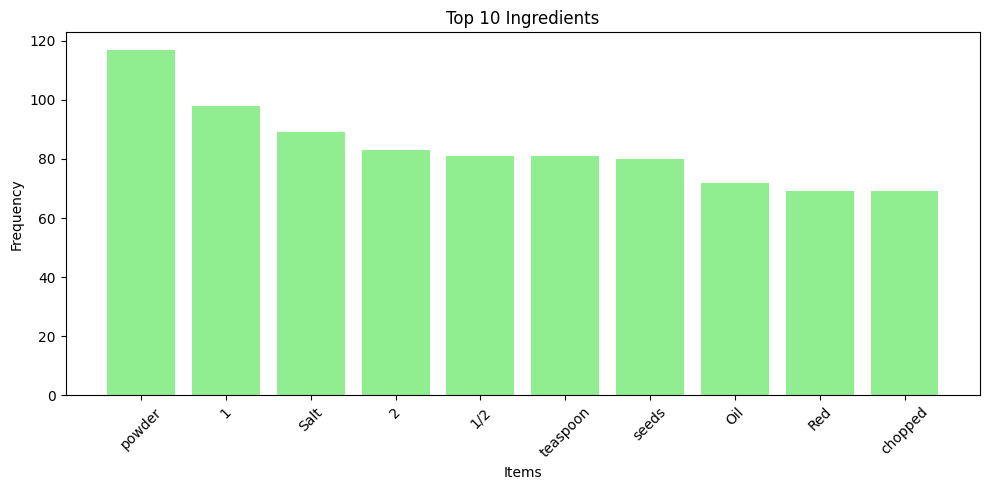

In [155]:
# plot the top frequent ingredients in training data
plot_top_items(ingredients_list, title='Top 10 Ingredients', color='lightgreen')

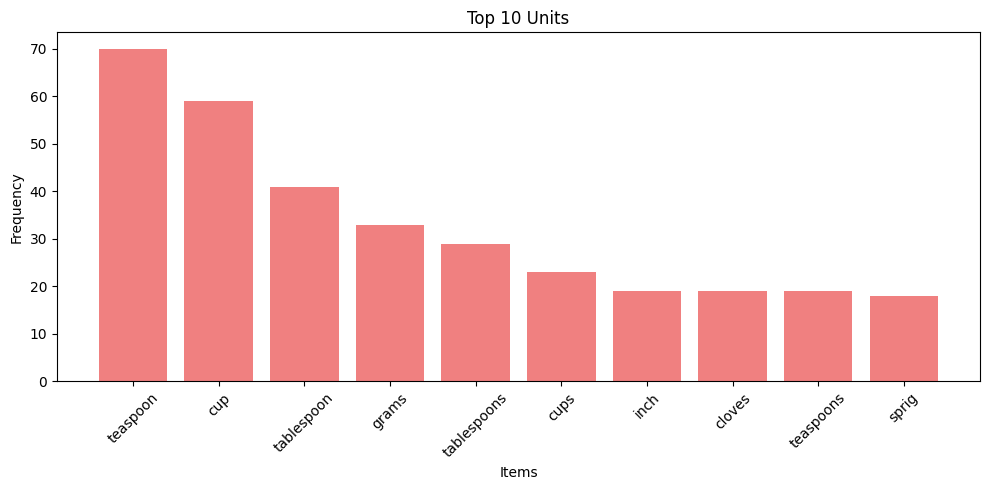

In [156]:
# plot the top frequent units in training data
plot_top_items(units_list, title='Top 10 Units', color='lightcoral')

## **5** Exploratory Recipe Data Analysis on Validation Dataset (Optional)<font color = red> [0 marks]</font> <br>

#### **5.1** *Execute EDA on Validation Dataset with insights (Optional)* <font color = red> [0 marks]</font> <br>
Initialise the dataset_name as ***Validation*** and call the ***plot_top_items*** for top 10 ingredients and units in the recipe data
Provide the insights for the same.



In [157]:
# initialise the dataset_name


In [158]:
# use extract and validate tokens, categorise tokens, get top frequent items for ingredient list and unit list on validation dataframe


In [159]:
# plot the top frequent ingredients in validation data


In [160]:
# plot the top frequent units in training data


## **6** Feature Extraction For CRF Model <font color = red>[30 marks]</font> <br>

### **6.1** *Define a feature functions to take each token from recipe* <font color = red>[10 marks]</font>

Define a function as ***word2features*** which takes a particular recipe and its index to work with all recipe input tokens and include custom key-value pairs.

Also, use feature key-value pairs to mark the beginning and end of the sequence and to also check whether the word belongs to unit, quantity etc. Use keyword sets for unit and quantity for differentiating feature functions well. Also make use of relevant regex patterns on fractions, whole numbers etc.

##### **6.1.1** **Define keywords for unit and quantity and create a quantity pattern to work on fractions, numbers and decimals** <font color = red>[3 marks]</font> <br>

Create sets for **unit_keywords** and ***quantity_keywords*** and include all the words relevant for measuring the ingredients such as cup, tbsp, tsp etc. and in quantity keywords, include words such as half, quarter etc.

Also suggested to use regex pattern as ***quantity_pattern*** to work with quantity in any format such as fractions, numbers and decimals.

Then, load the spacy model and process the entire sentence

In [161]:
# define unit and quantity keywords along with quantity pattern
import re

unit_keywords = {
    'cup', 'cups', 'tablespoon', 'tablespoons', 'tbsp', 'teaspoon', 'teaspoons', 'tsp',
    'gram', 'grams', 'g', 'kg', 'kilogram', 'kilograms', 'mg',
    'ml', 'milliliter', 'milliliters', 'liter', 'liters', 'ltr',
    'oz', 'ounce', 'ounces', 'lb', 'pound', 'pounds',
    'pinch', 'dash', 'clove', 'cloves', 'can', 'cans', 'bottle', 'bottles',
    'stick', 'sticks', 'piece', 'pieces', 'slice', 'slices', 'packet', 'packets'
}

quantity_keywords = {
    'half', 'quarter', 'third', 'one', 'two', 'three', 'four', 'five',
    'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve',
    'dozen', 'few', 'couple', 'several', 'some', 'many'
}


quantity_pattern = re.compile(r'^(\d+\s)?\d+/\d+$|^\d+\.\d+$|^\d+$')


In [162]:
# load spaCy model
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Mix 2 cups of flour with half a teaspoon of salt.")
for token in doc:
    print(f"{token.text:>10} | POS: {token.pos_:<10} | Dep: {token.dep_:<10}")


       Mix | POS: NOUN       | Dep: ROOT      
         2 | POS: NUM        | Dep: nummod    
      cups | POS: NOUN       | Dep: dobj      
        of | POS: ADP        | Dep: prep      
     flour | POS: NOUN       | Dep: pobj      
      with | POS: ADP        | Dep: prep      
      half | POS: DET        | Dep: predet    
         a | POS: DET        | Dep: det       
  teaspoon | POS: NOUN       | Dep: pobj      
        of | POS: ADP        | Dep: prep      
      salt | POS: NOUN       | Dep: pobj      
         . | POS: PUNCT      | Dep: punct     


##### **6.1.2** **Define feature functions for CRF** <font color = red>[7 marks]</font> <br>

Define ***word2features*** function and use the parameters such as sentence and its indexing as ***sent*** and ***i*** for extracting token level features for CRF Training.
Build ***features*** dictionary, also mark the beginning and end of the sequence and use the ***unit_keywords***, ***quantity_keywords*** and ***quantity_pattern*** for knowing the presence of quantity or unit in the tokens

While building ***features*** dictionary, include
- ***Core Features*** - The core features of a token should capture its lexical
and grammatical properties. Include attributes like the raw token, its lemma, part-of-speech tag, dependency relation, and shape, as well as indicators for whether it's a stop word, digit, or punctuation. The details of the features are given below:

    - `bias` - Constant feature with a fixed value of 1.0 to aid model learning.
    - `token` - The lowercase form of the current token.
    - `lemma` - The lowercase lemma (base form) of the token.
    - `pos_tag` - Part-of-speech (POS) tag of the token.
    - `tag` - Detailed POS tag of the token.
    - `dep` - Dependency relation of the token in the sentence.
    - `shape` - Shape of the token (e.g., "Xxx" for "Milk").
    - `is_stop` - Boolean indicating if the token is a stopword.
    - `is_digit` - Boolean indicating if the token consists of only digits.
    - `has_digit` - Boolean indicating if the token contains at least one digit.
    - `has_alpha` - Boolean indicating if the token contains at least one alphabetic character.
    - `hyphenated` - Boolean indicating if the token contains a hyphen (-).
    - `slash_present` - Boolean indicating if the token contains a slash (/).
    - `is_title` - Boolean indicating if the token starts with an uppercase letter.
    - `is_upper` - Boolean indicating if the token is fully uppercase.
    - `is_punct` - Boolean indicating if the token is a punctuation mark.

- ***Improved Quantity and Unit Detection*** - Use key-value pairs to mark the presence of quantities and units in the features dictionary. Utilise the unit_keywords, quantity_keywords, and quantity_pattern to identify and flag these elements. The details of the features are given below:

    - `is_quantity` - Boolean indicating if the token matches a quantity pattern or keyword.
    - `is_unit` - Boolean indicating if the token is a known measurement unit.
    - `is_numeric` - Boolean indicating if the token matches a numeric pattern.
    - `is_fraction` - Boolean indicating if the token represents a fraction (e.g., 1/2).
    - `is_decimal` - Boolean indicating if the token represents a decimal number (e.g., 3.14).
    - `preceding_word` - The previous token in the sentence, if available.
    - `following_word` - The next token in the sentence, if available.

- ***Contextual Features*** - Incorporate contextual information by adding features for the preceding and following tokens. Include indicators like BOS and EOS to mark the beginning and end of the sequence, and utilise unit_keywords, quantity_keywords, and quantity_pattern to identify the types of neighboring tokens. The features are given below:

    - `prev_token` - The lowercase form of the previous token.
    - `prev_is_quantity` - Boolean indicating if the previous token is a quantity.
    - `prev_is_digit` - Boolean indicating if the previous token is a digit.
    - `BOS` - Boolean indicating if the token is at the beginning of the sentence.
    - `next_token` - The lowercase form of the next token.
    - `next_is_unit` - Boolean indicating if the next token is a unit.
    - `next_is_ingredient` - Boolean indicating if the next token is not a unit or quantity.
    - `EOS` - Boolean indicating if the token is at the end of the sentence.



In [188]:
# define word2features for processing each token in the sentence sent by using index i.
# use your own feature functions

    # Process the entire sentence with spaCy

    # --- Core Features ---

    # --- Improved Quantity & Unit Detection ---

    # --- Contextual Features ---
import re

known_units = {'cup', 'cups', 'tablespoon', 'teaspoon', 'grams', 'g', 'kg', 'ml', 'liter', 'litre', 'oz', 'pound'}
known_quantity_words = {'half', 'quarter', 'third', 'one', 'two', 'three', 'four', 'five'}

fraction_pattern = re.compile(r'^\d+\s*/\s*\d+$')
decimal_pattern = re.compile(r'^\d+\.\d+$')
whole_number_pattern = re.compile(r'^\d+$')

def word2features(sent, i):
    """
    Extracts features for token at index `i` from a spaCy-processed sentence `sent`
    """
    token = sent[i]
    word_text = token.text
    word_lower = word_text.lower()

    features = {
        # Core lexical features
        'bias': 1.0,
        'token': word_lower,
        'lemma': token.lemma_.lower(),
        'pos_tag': token.pos_,
        'tag': token.tag_,
        'dep': token.dep_,
        'shape': token.shape_,
        'is_stop': token.is_stop,
        'is_digit': token.is_digit,
        'has_digit': any(char.isdigit() for char in word_text),
        'has_alpha': any(char.isalpha() for char in word_text),
        'hyphenated': '-' in word_text,
        'slash_present': '/' in word_text,
        'is_title': token.is_title,
        'is_upper': token.is_upper,
        'is_punct': token.is_punct,

        # Quantity & unit detection
        'is_quantity': word_lower in quantity_keywords or bool(quantity_pattern.match(word_text)),
        'is_unit': word_lower in unit_keywords,
        'is_numeric': bool(quantity_pattern.match(word_text)),
        'is_fraction': re.match(r'^\d+/\d+$', word_text) is not None,
        'is_decimal': re.match(r'^\d+\.\d+$', word_text) is not None,
        'preceding_word': sent[i-1].text if i > 0 else '',
        'following_word': sent[i+1].text if i < len(sent)-1 else '',

        # Sentence position
        'BOS': i == 0,
        'EOS': i == len(sent) - 1,
    }

    # Previous token features
    if i > 0:
        prev = sent[i - 1].text.lower()
        features.update({
            'prev_token': prev,
            'prev_is_quantity': prev in quantity_keywords or bool(quantity_pattern.match(prev)),
            'prev_is_digit': prev.isdigit()
        })

    # Next token features
    if i < len(sent) - 1:
        next = sent[i + 1].text.lower()
        features.update({
            'next_token': next,
            'next_is_unit': next in unit_keywords,
            'next_is_ingredient': next not in unit_keywords and next not in quantity_keywords
        })

    return features


### **6.2** *Preparation of Recipe level features* <font color = red>[2 marks]</font>


##### **6.2.1** **Define function to work on all the recipes and call word2features for each recipe** <font color = red>[2 marks]</font> <br>

Define ***sent2features*** function and inputs ***sent*** as a parameter and correctly generate feature functions for each token present in the sentence

In [190]:
# define sent2features by working on each token in the sentence and correctly generate dictionaries for features
def sent2features(sent):
      return [word2features(sent, i) for i in range(len(sent))]


### **6.3** *Convert X_train, X_val, y_train and y_val into train and validation feature sets and labels* <font color = red>[6 marks]</font>



##### **6.3.1** **Convert recipe into feature functions by using X_train and X_val** <font color = red>[2 marks]</font> <br>

Create ***X_train_features*** and ***X_val_features*** as list to include the feature functions for each recipe present in training and validation sets

In [191]:
import spacy
nlp = spacy.load("en_core_web_sm")

X_train = train_df['input_tokens'].tolist()
X_val = val_df['input_tokens'].tolist()

X_train_features = [sent2features(nlp(' '.join(tokens))) for tokens in X_train]
X_val_features = [sent2features(nlp(' '.join(tokens))) for tokens in X_val]

##### **6.3.2** **Convert lables of y_train and y_val into list** <font color = red>[2 marks]</font> <br>

Create ***y_train_labels*** and ***y_val_labels*** by using the list of y_train and y_val

In [192]:
y_train_labels = train_df['pos_tokens'].tolist()
y_val_labels = val_df['pos_tokens'].tolist()


print("Number of training label sequences:", len(y_train_labels))
print("Number of validation label sequences:", len(y_val_labels))

Number of training label sequences: 199
Number of validation label sequences: 86


##### **6.3.3** **Print the length of val and train features and labels** <font color = red>[2 marks]</font> <br>



In [193]:
# print the length of train features and labels

import spacy
nlp = spacy.load("en_core_web_sm")

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

X_train = train_df['input_tokens'].tolist()
y_train_labels = train_df['pos_tokens'].tolist()

X_train_features = [sent2features(nlp(' '.join(tokens))) for tokens in X_train]

print("Length of X_train_features:", len(X_train_features))
print("Length of y_train_labels:", len(y_train_labels))




Length of X_train_features: 199
Length of y_train_labels: 199


In [194]:
# print the length of validation features and labels

import spacy
nlp = spacy.load("en_core_web_sm")

def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

X_val = val_df['input_tokens'].tolist()
y_val_labels = val_df['pos_tokens'].tolist()
X_val_features = [sent2features(nlp(' '.join(tokens))) for tokens in X_val]

print("Length of X_val_features:", len(X_val_features))
print("Length of y_val_labels:", len(y_val_labels))


Length of X_val_features: 86
Length of y_val_labels: 86


### **6.4** *Applying weights to feature sets* <font color = red>[12 marks]</font> <br>




##### **6.4.1** **Flatten the labels of y_train** <font color = red>[2 marks]</font> <br>

Create ***y_train_flat*** to flatten the structure of nested y_train

In [195]:
# Flatten labels in y_train
print("Type of y_train_labels:", type(y_train_labels))
print("Example from y_train_labels:", y_train_labels[0])
y_train_flat = [label for sentence in y_train_labels for label in sentence]
print("Total number of label sequences in y_train_labels:", len(y_train_labels))
print("Total number of labels in y_train_flat:", len(y_train_flat))
print("First 10 labels in y_train_flat:", y_train_flat[:10])


Type of y_train_labels: <class 'list'>
Example from y_train_labels: ['quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'unit', 'ingredient', 'ingredient']
Total number of label sequences in y_train_labels: 199
Total number of labels in y_train_flat: 7073
First 10 labels in y_train_flat: ['quantity', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity']


##### **6.4.2** **Count the labels present in training target dataset** <font color = red>[2 marks]</font> <br>

Create ***label_counts*** to count the frequencies of labels present in y_train_flat and retrieve the total samples by using the values of label_counts as ***total_samples***

In [196]:
# Count label frequencies as label_counts and total_samples as getting the summation of values of label_counts
from collections import Counter
label_counts = Counter(y_train_flat)
total_samples = sum(label_counts.values())
print("Label Frequencies (label_counts):")
for label, count in label_counts.items():
    print(f"{label}: {count}")

print("\nTotal number of labels (total_samples):", total_samples)

Label Frequencies (label_counts):
quantity: 989
ingredient: 5251
unit: 833

Total number of labels (total_samples): 7073


##### **6.4.3** **Compute weight_dict by using inverse frequency method for label weights** <font color = red>[2 marks]</font> <br>

- Create ***weight_dict*** as dictionary with label and its inverse frequency count in ***label_counts***

- Penalise ingredient label in the dictionary

In [197]:
# Compute class weights (inverse frequency method) by considering total_samples and label_counts
from collections import Counter
label_counts = Counter(y_train_flat)
weight_dict = {label: 1.0 / count for label, count in label_counts.items()}
print("Inverse Frequency Weights (weight_dict):")
for label, weight in weight_dict.items():
    print(f"{label}: {weight:.4f}")

Inverse Frequency Weights (weight_dict):
quantity: 0.0010
ingredient: 0.0002
unit: 0.0012


In [198]:
# penalise ingredient label
weight_dict['ingredient'] *= 0.5
print("Adjusted Weights (penalizing 'ingredient'):")
for label, weight in weight_dict.items():
    print(f"{label}: {weight:.4f}")

Adjusted Weights (penalizing 'ingredient'):
quantity: 0.0010
ingredient: 0.0001
unit: 0.0012


##### **6.4.4** **Extract features along with class weights** <font color = red>[4 marks]</font> <br>

Define a function ***extract_features_with_class_weights*** to work with training and validation datasets and extract features by applying class weights





In [212]:
# Apply weights to feature extraction in extract_features_with_class_weights by using parameters such as X (input tokens), y(labels) and weight_dict (Class weights)
def extract_features_with_class_weights(X, y, weight_dict, dataset_name='Dataset'):
    features_with_weights = []
    skipped = 0

    for sentence_tokens, labels in zip(X, y):
        if len(sentence_tokens) != len(labels):
            skipped += 1
            continue  # Skip mismatched rows

        sentence_features = []

        for i in range(len(sentence_tokens)):
            # Use a dummy Doc object or simulate minimal spaCy-like token features
            token_text = sentence_tokens[i]

            # Simulated spaCy-like doc for word2features
            doc = [{'text': token} for token in sentence_tokens]

            # You may need a simplified version of word2features if using raw text
            features = word2features(doc, i)
            label = labels[i]
            features['class_weight'] = weight_dict.get(label, 1.0)
            sentence_features.append(features)

        features_with_weights.append(sentence_features)

    print(f"✅ Extracted features with class weights for {dataset_name}: {len(features_with_weights)} samples")
    print(f"⚠️  Skipped {skipped} mismatched samples")
    return features_with_weights






##### **6.4.5** **Execute extract_features_with_class_weights on training and validation datasets** <font color = red>[2 marks]</font> <br>

Create ***X_train_weighted_features*** and ***X_val_weighted_features*** for extracting training and validation features along with their weights by calling ***extract_features_with_class_weights*** on the datasets

In [219]:
# Apply manually computed class weights
def extract_features_with_class_weights(X, y, weight_dict, dataset_name='Dataset'):
    features_with_weights = []
    skipped = 0

    for sentence_tokens, labels in zip(X, y):
        if len(sentence_tokens) != len(labels):
            skipped += 1
            continue

        sentence = ' '.join(sentence_tokens)
        doc = nlp(sentence)

        # Align based on token text
        doc_tokens = [token.text for token in doc]
        if len(doc_tokens) != len(labels):
            skipped += 1
            continue

        sentence_features = []
        for i, token in enumerate(doc):
            features = word2features(doc, i)  # expects spaCy Doc
            features['class_weight'] = weight_dict.get(labels[i], 1.0)
            sentence_features.append(features)

        features_with_weights.append(sentence_features)

    print(f"✅ Extracted features with weights for {dataset_name}: {len(features_with_weights)} samples")
    print(f"⚠️ Skipped {skipped} mismatched samples")
    return features_with_weights

import spacy
nlp = spacy.load("en_core_web_sm")
X_train_weighted_features = extract_features_with_class_weights(
    X_train, y_train_labels, weight_dict, dataset_name='Training'
)

X_val_weighted_features = extract_features_with_class_weights(
    X_val, y_val_labels, weight_dict, dataset_name='Validation'
)


✅ Extracted features with weights for Training: 140 samples
⚠️ Skipped 59 mismatched samples
✅ Extracted features with weights for Validation: 64 samples
⚠️ Skipped 22 mismatched samples


## **7** Model Building and Training <font color = red>[10 marks]</font> <br>

### **7.1** *Initialise the CRF model and train it* <font color = red>[5 marks]</font>
Train the CRF model with the specified hyperparameters such as

### CRF Model Hyperparameters Explanation

| Parameter                  | Description |
|----------------------------|-------------|
| **algorithm='lbfgs'**      | Optimisation algorithm used for training. `lbfgs` (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is a quasi-Newton optimisation method. |
| **c1=0.5**                | L1 regularisation term to control sparsity in feature weights. Helps in feature selection. |
| **c2=1.0**                | L2 regularisation term to prevent overfitting by penalising large weights. |
| **max_iterations=100**     | Maximum number of iterations for model training. Higher values allow more convergence but increase computation time. |
| **all_possible_transitions=True** | Ensures that all possible state transitions are considered in training, making the model more robust. |

Use weight_dict for training CRF



In [233]:
!pip install sklearn-crfsuite
from sklearn_crfsuite import CRF

# Initialize the CRF model
crf_model = CRF(
    algorithm='lbfgs',
    c1=0.5,
    c2=1.0,
    max_iterations=100,
    all_possible_transitions=True
)

# train the CRF model with the weighted training data

def extract_features_with_class_weights_strict(X, y, weight_dict, dataset_name='Dataset'):
    features_with_weights = []
    aligned_labels = []
    skipped = 0

    for sentence_tokens, labels in zip(X, y):
        if len(sentence_tokens) != len(labels):
            skipped += 1
            continue

        doc = nlp(' '.join(sentence_tokens))
        doc_tokens = [token.text for token in doc]

        if len(doc_tokens) != len(labels):
            skipped += 1
            continue

        sentence_features = []
        for i, token in enumerate(doc):
            features = word2features(doc, i)
            features['class_weight'] = weight_dict.get(labels[i], 1.0)
            sentence_features.append(features)

        features_with_weights.append(sentence_features)
        aligned_labels.append(labels)

    print(f"✅ Extracted {len(features_with_weights)} samples for {dataset_name}")
    print(f"⚠️ Skipped {skipped} mismatched samples")
    return features_with_weights, aligned_labels


X_train_weighted_features, y_train_aligned = extract_features_with_class_weights_strict(
    X_train, y_train_labels, weight_dict, dataset_name='Training'
)

# Then fit the model
crf_model.fit(X_train_weighted_features, y_train_aligned)





✅ Extracted 140 samples for Training
⚠️ Skipped 59 mismatched samples


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.5, c2=1.0,
    max_iterations=100)

### **7.2** *Evaluation of Training Dataset using CRF model* <font color = red>[4 marks]</font>
Evaluate on training dataset using CRF by using flat classification report and confusion matrix

🔍 Classification Report (Training Data):
              precision    recall  f1-score   support

  ingredient       0.99      1.00      0.99      3470
    quantity       1.00      0.98      0.99       661
        unit       0.98      0.97      0.97       560

    accuracy                           0.99      4691
   macro avg       0.99      0.98      0.98      4691
weighted avg       0.99      0.99      0.99      4691



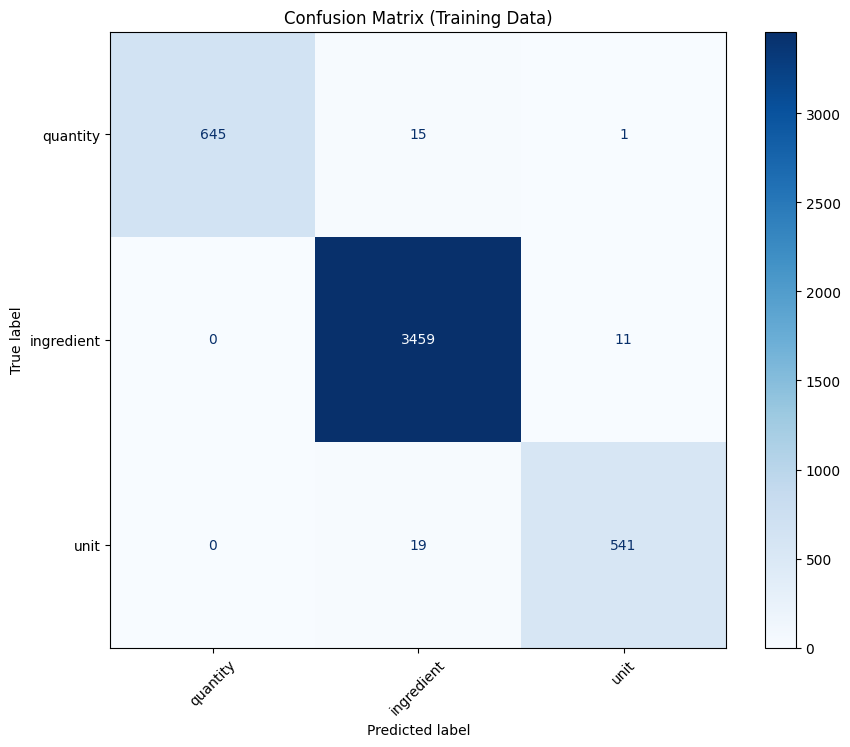

In [234]:
# evaluate on the training dataset
!pip install sklearn-crfsuite
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the training set
y_train_pred = crf_model.predict(X_train_weighted_features)

# Classification report
print("🔍 Classification Report (Training Data):")
print(flat_classification_report(y_pred=y_train_pred, y_true=y_train_aligned))

# Flatten labels
y_true_flat = [label for sent in y_train_aligned for label in sent]
y_pred_flat = [label for sent in y_train_pred for label in sent]

# Confusion matrix
labels = list(crf_model.classes_)
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=labels)

# Display matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Training Data)")
plt.show()






In [237]:
# specify the flat classification report by using training data for evaluation
!pip install sklearn-crfsuite
from sklearn_crfsuite.metrics import flat_classification_report

y_train_pred = crf_model.predict(X_train_weighted_features)

print("🔍 Flat Classification Report (Training Data):")
print(flat_classification_report(y_true=y_train_aligned, y_pred=y_train_pred))

🔍 Flat Classification Report (Training Data):
              precision    recall  f1-score   support

  ingredient       0.99      1.00      0.99      3470
    quantity       1.00      0.98      0.99       661
        unit       0.98      0.97      0.97       560

    accuracy                           0.99      4691
   macro avg       0.99      0.98      0.98      4691
weighted avg       0.99      0.99      0.99      4691



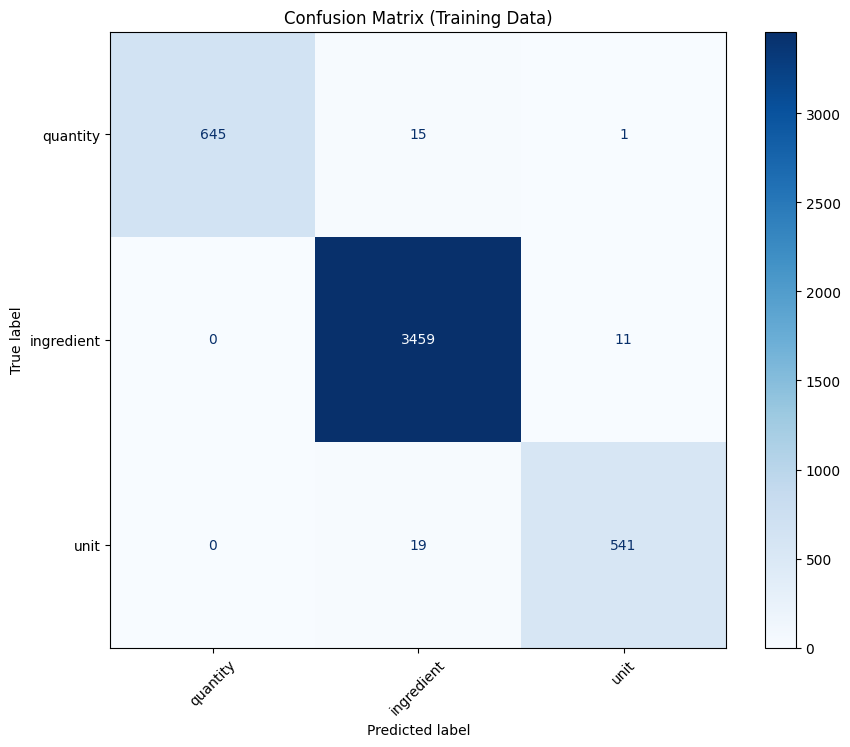

In [236]:
# create a confusion matrix on training datset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Training Data)")
plt.show()
labels = list(crf_model.classes_)
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=labels)

### **7.3** *Save the CRF model* <font color = red>[1 marks]</font>
Save the CRF model

In [238]:
# dump the model using joblib as crf_model.pkl
!pip install sklearn-crfsuite
from sklearn_crfsuite import CRF

crf_model = CRF(
    algorithm='lbfgs',
    c1=0.5,
    c2=1.0,
    max_iterations=100,
    all_possible_transitions=True
)

crf_model.fit(X_train_weighted_features, y_train_aligned)

import joblib
joblib.dump(crf_model, 'crf_model.pkl')
print("✅ CRF model has been saved as 'crf_model.pkl'")



✅ CRF model has been saved as 'crf_model.pkl'


## **8** Prediction and Model Evaluation <font color = red>[3 marks]</font> <br>

### **8.1** *Predict and Evaluate the CRF model on validation set* <font color = red>[3 marks]</font>
Evaluate the metrics for CRF model by using flat classification report and confusion matrix




In [241]:
# predict the crf model on validation dataset

def extract_features_with_class_weights_strict(X, y, weight_dict, dataset_name='Dataset'):
    features_with_weights = []
    aligned_labels = []
    skipped = 0

    for sentence_tokens, labels in zip(X, y):
        if len(sentence_tokens) != len(labels):
            skipped += 1
            continue

        doc = nlp(' '.join(sentence_tokens))
        doc_tokens = [token.text for token in doc]

        if len(doc_tokens) != len(labels):
            skipped += 1
            continue

        sentence_features = []
        for i, token in enumerate(doc):
            features = word2features(doc, i)
            features['class_weight'] = weight_dict.get(labels[i], 1.0)
            sentence_features.append(features)

        features_with_weights.append(sentence_features)
        aligned_labels.append(labels)

    print(f"✅ Extracted {len(features_with_weights)} samples for {dataset_name}")
    print(f"⚠️ Skipped {skipped} mismatched samples")
    return features_with_weights, aligned_labels

X_val_weighted_features, y_val_aligned = extract_features_with_class_weights_strict(
    X_val, y_val_labels, weight_dict, dataset_name='Validation'
)

y_val_pred = crf_model.predict(X_val_weighted_features)

for i in range(2):
    print(f"\nSample {i+1}:")
    print("Tokens: ", X_val[i])
    print("True Labels: ", y_val_aligned[i])
    print("Predicted Labels: ", y_val_pred[i])



from sklearn_crfsuite import CRF

crf_model = CRF(
    algorithm='lbfgs',
    c1=0.5,
    c2=1.0,
    max_iterations=100,
    all_possible_transitions=True
)

crf_model.fit(X_train_weighted_features, y_train_aligned)


y_val_pred = crf_model.predict(X_val_weighted_features)


for i in range(2):
    print(f"\nSample {i+1}:")
    print("Tokens: ", X_val[i])
    print("True Labels: ", y_val_aligned[i])
    print("Predicted Labels: ", y_val_pred[i])



✅ Extracted 64 samples for Validation
⚠️ Skipped 22 mismatched samples

Sample 1:
Tokens:  ['1', 'cup', 'cabbage', 'leaves', '3/4', 'tomatoes', '18', 'grams', 'tamarind', '2', 'tablespoons', 'white', 'urad', 'dal', '4', 'red', 'chillies', '3', 'cloves', 'garlic', 'big', 'Spoon', 'oil', 'teaspoon', 'Rye', '1/2', 'Cumin', 'seeds', 'sprig', 'Curry']
True Labels:  ['quantity', 'unit', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity', 'unit', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'ingredient', 'unit', 'ingredient', 'unit', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'unit', 'ingredient']
Predicted Labels:  ['quantity', 'unit', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'quantity', 'unit', 'ingredient', 'quantity', 'unit', 'ingredient', 'ingredient', 'ingredient', 'quantity', 'ingredient', 'ingredient', 'quantity', 'unit', 'ingredient', 'i

In [242]:
# specify flat classification report
!pip install sklearn-crfsuite
from sklearn_crfsuite.metrics import flat_classification_report

print("📊 Flat Classification Report (Validation Data):")
print(flat_classification_report(y_true=y_val_aligned, y_pred=y_val_pred))




📊 Flat Classification Report (Validation Data):
              precision    recall  f1-score   support

  ingredient       0.99      1.00      0.99      1552
    quantity       1.00      0.98      0.99       291
        unit       0.98      0.94      0.96       247

    accuracy                           0.99      2090
   macro avg       0.99      0.97      0.98      2090
weighted avg       0.99      0.99      0.99      2090



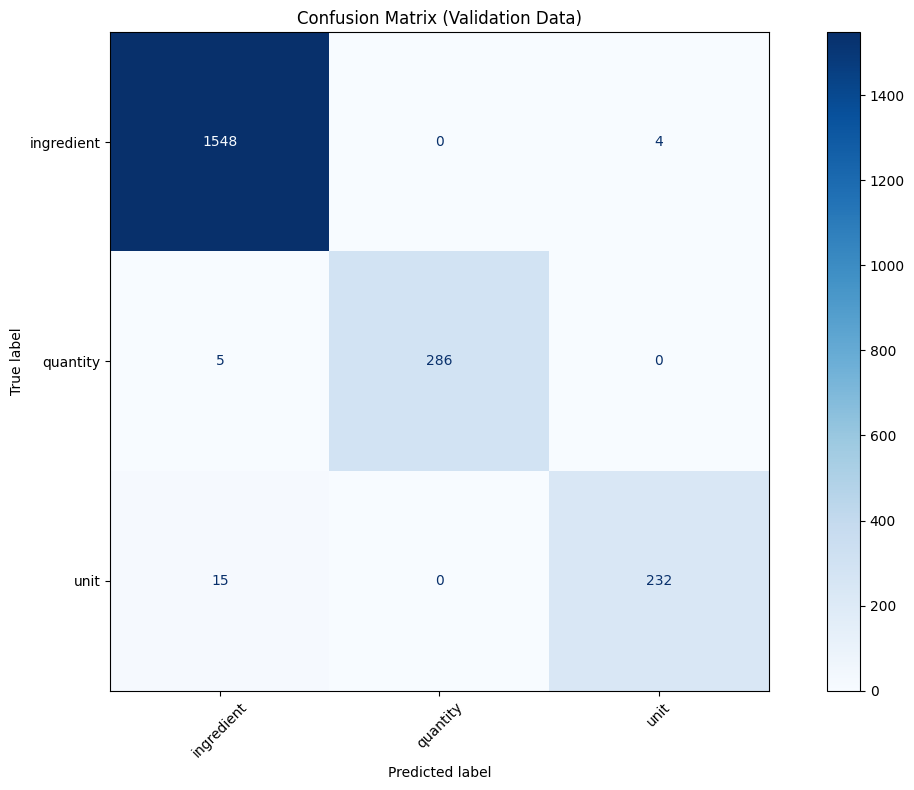

In [243]:
# create a confusion matrix on validation dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_val_true_flat = [label for sent in y_val_aligned for label in sent]
y_val_pred_flat = [label for sent in y_val_pred for label in sent]

all_labels = sorted(set(y_val_true_flat) | set(y_val_pred_flat))


cm = confusion_matrix(y_val_true_flat, y_val_pred_flat, labels=all_labels)

fig, ax = plt.subplots(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Validation Data)")
plt.tight_layout()
plt.show()


## **9** Error Analysis on Validation Data <font color = red>[10 marks]</font> <br>
Investigate misclassified samples in validation dataset and provide the insights


### **9.1** *Investigate misclassified samples in validation dataset* <font color = red>[8 marks]</font>



##### **9.1.1** Flatten the labels of validation data and initialise error data <font color = red>[2 marks]</font> <br>



Flatten the true and predicted labels and initialise the error data as ***error_data***

In [245]:
# flatten Labels and Initialise Error Data
# Flatten true and predicted validation labels
y_val_true_flat = [label for sent in y_val_aligned for label in sent]
y_val_pred_flat = [label for sent in y_val_pred for label in sent]

error_data = []

# Loop through validation samples safely
for sent_idx, (true_sent, pred_sent, tokens) in enumerate(zip(y_val_aligned, y_val_pred, X_val)):
    # Ensure all lengths match
    min_len = min(len(true_sent), len(pred_sent), len(tokens))

    for i in range(min_len):
        true_label = true_sent[i]
        pred_label = pred_sent[i]
        token = tokens[i]

        if true_label != pred_label:
            error_data.append({
                "sentence_index": sent_idx,
                "token": token,
                "true_label": true_label,
                "predicted_label": pred_label
            })

# Convert to DataFrame and display
import pandas as pd
error_df = pd.DataFrame(error_data)
error_df.head(10)



,sentence_index,token,true_label,predicted_label
0,0,cloves,ingredient,unit
1,0,Spoon,unit,ingredient
2,4,teaspoon,unit,ingredient
3,4,Haldi,unit,ingredient
4,9,Potatoes,unit,ingredient
5,14,inch,unit,ingredient
6,14,Ginger,unit,ingredient
7,15,Salt,unit,ingredient
8,15,baking,quantity,ingredient
9,19,Powder,unit,ingredient


##### **9.1.2** Iterate the validation data and collect Error Information<font color = red> [2 marks]</font> <br>



Iterate through validation data (X_val, y_val_labels, y_pred_val) and compare true vs. predicted labels. Collect error details, including surrounding context, previous/next tokens, and class weights, then store them in error_data

In [ ]:
# iterate and collect Error Information

            # get previous and next tokens with handling for boundary cases


##### **9.1.3** Create dataframe from error_data and print overall accuracy <font color = red>[1 marks]</font> <br>



Change error_data into dataframe and then use it to illustrate the overall accuracy of validation data

In [ ]:
# Create DataFrame and Print Overall Accuracy


##### **9.1.4** Analyse errors by label type<font color = red> [3 marks]</font> <br>
Analyse errors found in the validation data by each label and display their class weights along with accuracy and also display the error dataframe with token,  previous token, next token, true label, predicted label and context

In [ ]:
# Analyse errors found in the validation data by each label
# and display their class weights along with accuracy
# and display the error dataframe with token, previous token, next token, true label, predicted label and context



### **9.2** *Provide insights from the validation dataset* <font color = red>[2 marks]</font>




 <font color = red>[Write your answer]</font>

## **10** Conclusion (Optional) <font color = red>[0 marks]</font> <br>

Write your findings and conclusion.